### Performance tests
In this notebook we test the performance of the CURE, DBSCAN, hierarchical and k-means clustering models. Each will be tested using datasets of varying sizes. The same parameters will be used for each run, with Euclidean squared distances used throughout.

In [1]:
\c 20 100
\l ml/ml.q
.ml.loadfile`:clust/init.q
plt:.p.import`matplotlib.pyplot

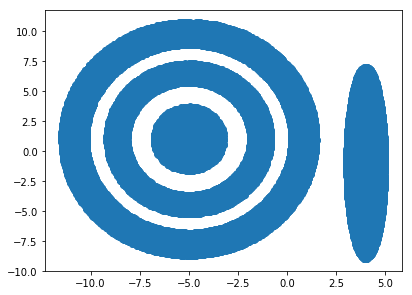

In [2]:
dsc:{[n;r;s](r+n?s-r)*/:(cos;sin)@\:4*n?acos 0}
d :flip(-5 1)+(1 1.5)*dsc[10000;0;1.8],'dsc[20000;3.1;4.2],'dsc[40000;5.2;6.5]
d,:flip(4 -1)+(1 8)*dsc[40000;0;1.]
plt[`:scatter][;]. flip d;
plt[`:show][];

In [3]:
sample:{x neg[y&count x]?count x}
n:100 500 1000 5000 10000
show data:(`$"d",/:string each n)!sample[d]each n

d100  | (4.037795 -0.8126271;-9.641302 5.935324;-7.56179 -1.691935;-6.473205 5.123087;-4.043433 6..
d500  | (4.068284 -1.364169;-8.601231 3.668754;-8.75718 -6.507413;1.158276 1.976697;-6.846222 8.8..
d1000 | (-4.516452 -8.56423;3.76931 -3.817085;3.989848 -3.049511;4.162999 -0.2173409;-5.439717 -0..
d5000 | (-0.2499006 -3.043139;-6.366623 -7.680081;-1.563971 -2.185901;4.549709 0.3669573;-9.94686..
d10000| (-9.215179 6.805891;3.359951 -0.1343191;-4.088882 3.050231;-1.004623 8.254884;4.002759 -1..


In [4]:
/input dictionary
id:`cure`dbscan`hc`kmeans!(` sv'`.ml.clust,'`cure`dbscan`hc`kmeans),'
        (enlist each((4;30;enlist each{![`df`c`b`s;x]}each(cross/)(`e2dist;0;01b;0b));
        (`e2dist;2;1.2);(4;`e2dist;((cross/)(`single`centroid;01b)),(cross/)(`average`complete`ward;0b))
        ;(4;50;0b;`e2dist))),'
        enlist each((2;`b);();enlist 2 3;())

/performance - returns time and space for a function
/* d = data
/* a = algo
perform:{[d;a]
 r:p[id[a;0];d]each i:(cross/)id[a;1];
 m:`$t:string a;
 if[a in`cure;m:`$t,/:"_",/:string each{k:.[y;id[x;2]];$[k~1b;`C;k~0b;`q;k]}[a]each i];
 if[a in`hc;m:`$'("_" sv '(enlist t),/:string each{k:.[y;id[x;2]];$[k~1b;`C;k~0b;`q;0b~last k;((first k),`q);
    (first k),`C]}[a]each i)];
 flip(`method,`$("time_";"space_"),\:string count d)!enlist[m],flip r}

/get algos
p:{.Q.ts[get[x]y;z]}

/select which columns to output
/* x = performance table
/* y = columns to select - `space`time
output:{str:string[y],"*";?[x;();0b;(`method,col)!`method,col:c where string[c:cols x]like str]}

In [5]:
t:(^/){raze perform[y]each key x}[id]each value data

In [6]:
show sp:output[t;`space]

method            space_100 space_500 space_1000 space_5000 space_10000
-----------------------------------------------------------------------
`cure_q           39456     161968    305264     1876128    3737008    
`cure_C           36400     156032    305280     1876144    3737024    
`dbscan           18496     339680    2344976    487510512  4213811984 
`h`c`_`single`q   52592     174416    299328     1756624    3489888    
`h`c`_`single`C   48736     169280    298432     1749440    3487168    
`h`c`_`centroid`q 44544     151280    289328     1771216    3530768    
`h`c`_`centroid`C 43904     151296    289344     1771232    3530784    
`h`c`_`average`q  144512    4185696   17058864   401229264  1620028576 
`h`c`_`complete`q 173088    3814912   15754144   397648496  1624978224 
`h`c`_`ward`q     28608     109600    215504     1561568    3120592    
`kmeans           22016     97792     194560     1165312    2329600    


In [7]:
show tm:output[t;`time]

method            time_100 time_500 time_1000 time_5000 time_10000
------------------------------------------------------------------
`cure_q           135      1168     3367      37700     114473    
`cure_C           4        34       102       1784      7510      
`dbscan           0        6        28        2666      22497     
`h`c`_`single`q   89       439      1391      38428     256434    
`h`c`_`single`C   2        23       78        1871      8658      
`h`c`_`centroid`q 24       108      253       2979      10333     
`h`c`_`centroid`C 4        21       72        1565      6819      
`h`c`_`average`q  26       568      2772      123653    718953    
`h`c`_`complete`q 19       573      2664      117075    664458    
`h`c`_`ward`q     11       262      1019      25688     105549    
`kmeans           2        14       27        141       330       


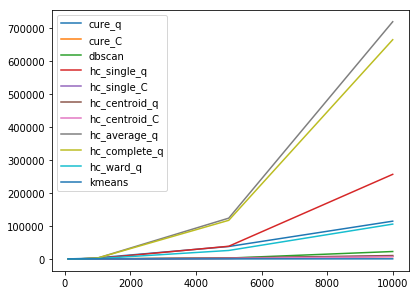

In [66]:
times:1_'value each tm 
{plt[`:plot][x;y;`label pykw z]}[n]'[times;t`method];
plt[`:legend][];
plt[`:show][];

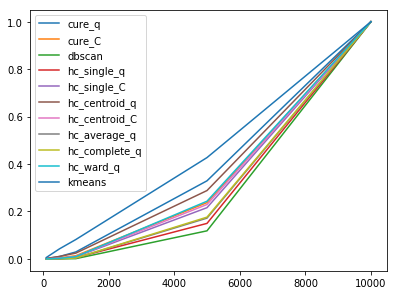

In [67]:
{plt[`:plot][x;y%max y;`label pykw z]}[n]'[times;t`method];
plt[`:legend][];
plt[`:show][];

---